In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

In [2]:
pip install py-espeak-ng

Note: you may need to restart the kernel to use updated packages.


In [3]:
from helper import load_image_from_url, render_results_in_image

/home/mikolaj/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from transformers import pipeline

2024-05-14 20:46:16.382389: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [5]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

In [45]:
od_pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

In [46]:
from PIL import Image

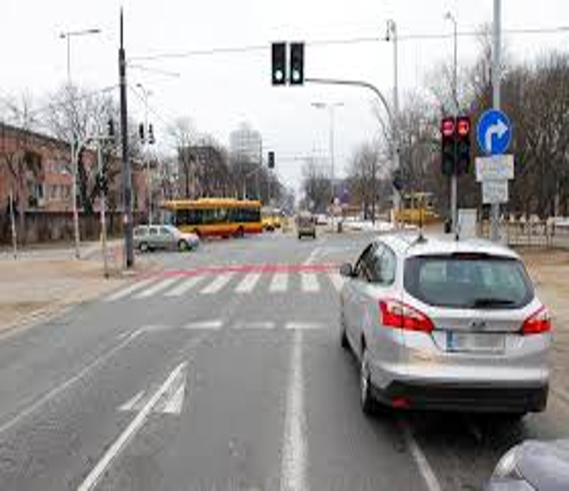

In [47]:
raw_image = Image.open('road.jpeg')
raw_image.resize((569, 491))

In [48]:
pipeline_output = od_pipe(raw_image)

In [49]:
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

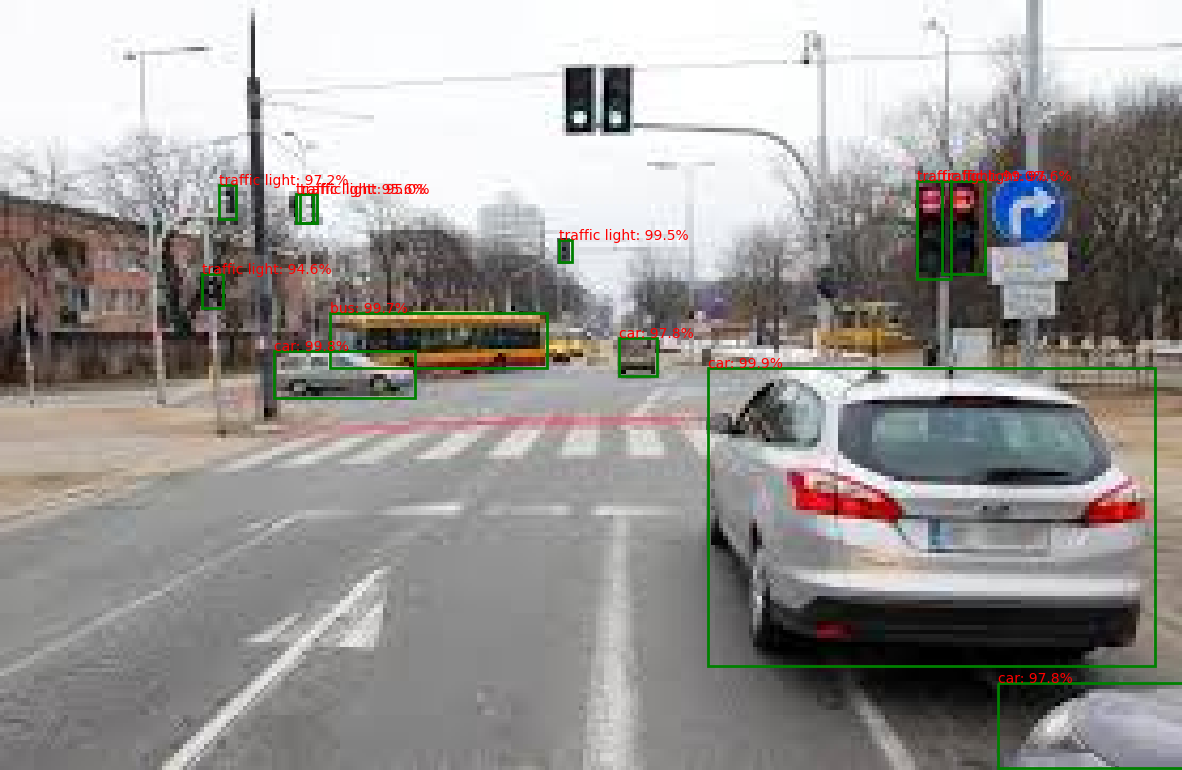

In [50]:
processed_image

In [51]:
import os
import gradio as gr

In [52]:
def get_pipeline_prediction(pil_image):
    
    pipeline_output = od_pipe(pil_image)
    
    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [53]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

IMPORTANT: You are using gradio version 3.34.0, however version 4.29.0 is available, please upgrade.
--------


In [54]:
demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://5ae0c5eb9b84f6a791.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [55]:
demo.close()

Closing server running on port: 7860


In [56]:
pipeline_output

[{'score': 0.9948523640632629,
  'label': 'traffic light',
  'box': {'xmin': 131, 'ymin': 56, 'xmax': 134, 'ymax': 61}},
 {'score': 0.972013533115387,
  'label': 'traffic light',
  'box': {'xmin': 51, 'ymin': 43, 'xmax': 55, 'ymax': 51}},
 {'score': 0.9779798984527588,
  'label': 'car',
  'box': {'xmin': 234, 'ymin': 160, 'xmax': 278, 'ymax': 180}},
 {'score': 0.9762042164802551,
  'label': 'traffic light',
  'box': {'xmin': 221, 'ymin': 42, 'xmax': 231, 'ymax': 64}},
 {'score': 0.9970024228096008,
  'label': 'bus',
  'box': {'xmin': 77, 'ymin': 73, 'xmax': 128, 'ymax': 86}},
 {'score': 0.9462721347808838,
  'label': 'traffic light',
  'box': {'xmin': 47, 'ymin': 64, 'xmax': 52, 'ymax': 72}},
 {'score': 0.949570894241333,
  'label': 'traffic light',
  'box': {'xmin': 70, 'ymin': 45, 'xmax': 74, 'ymax': 52}},
 {'score': 0.9983643889427185,
  'label': 'car',
  'box': {'xmin': 64, 'ymin': 82, 'xmax': 97, 'ymax': 93}},
 {'score': 0.955846905708313,
  'label': 'traffic light',
  'box': {'xm

In [57]:
od_pipe

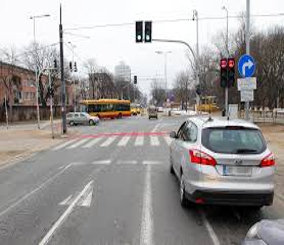

In [58]:
raw_image = Image.open('road.jpeg')
raw_image.resize((284, 245))

In [59]:
from helper import summarize_predictions_natural_language

In [60]:
text = summarize_predictions_natural_language(pipeline_output)

In [61]:
text

'In this image, there are seven traffic lights four cars and one bus.'